# Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

## Instructions

#### 1. Load the dataset and explore the variables.

import Libraries

In [1]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

In [4]:
# Define the features and target variable
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = data['Churn']

#### 3. Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

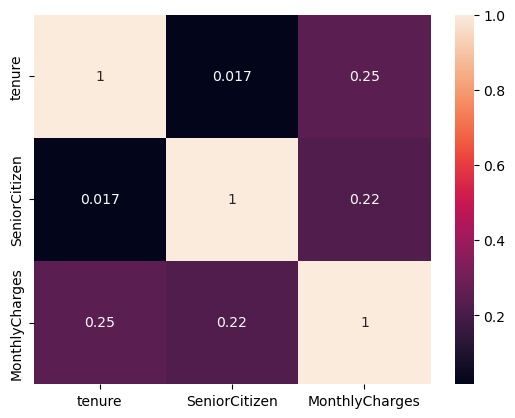

In [6]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

#### 4. Build the logistic regression model.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
# all features are numeric, so no need to split into _num and _cat. Transformer = scaler
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
2142,-0.465683,-0.437749,-0.000474
1623,0.885537,-0.437749,1.074754
6074,-1.284605,-0.437749,-1.376499
1362,-1.161766,-0.437749,0.177346
6754,-1.325551,-0.437749,-0.098524


In [9]:
y_train.head()

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

#### 5. Evaluate the model.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

In [11]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy of the model in the TEST set is: 0.81
The precision in the TEST set is: 0.70
The recall in the TEST set is: 0.49
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.45


In [12]:
# Print the confusion matrix to evaluate the model's performance
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[957  79]
 [192 181]]


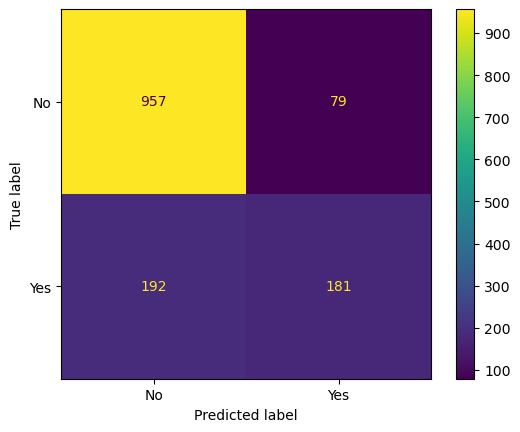

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr.classes_)
disp.plot()
plt.show()

#### 6. Even a simple model will give us more than 70% accuracy. Why?

ANSWER: The accuracy of more than 70% is probably because if high imbalance.

No     5174
Yes    1869
Name: Churn, dtype: int64


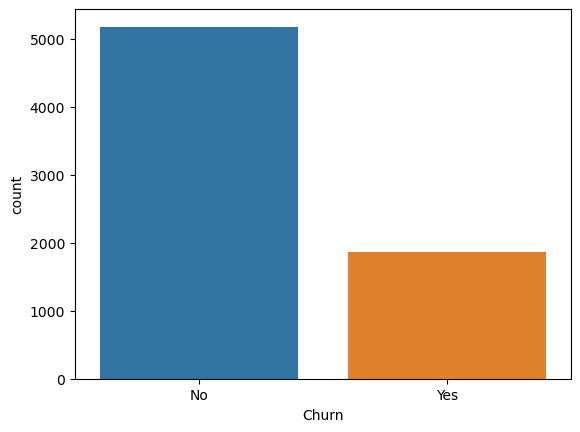

In [14]:
counts = data['Churn'].value_counts()
print(counts)
sns.countplot(x = 'Churn', data = data);
plt.show()

In [15]:
imbalance_ratio = counts[0] / counts[1]

print("Imbalance ratio:", imbalance_ratio)

Imbalance ratio: 2.7683253076511503


#### 7. Synthetic Minority Oversampling Technique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [16]:
from imblearn.over_sampling import SMOTE
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

In [17]:
sm = SMOTE(random_state=100,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [18]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5634, 3)
(8276, 3)


In [19]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label='Yes')))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label='Yes')))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label='Yes')))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.51
The recall in the TEST set is: 0.76
The F1 in the TEST set is: 0.61
The Kappa in the TEST set is: 0.43


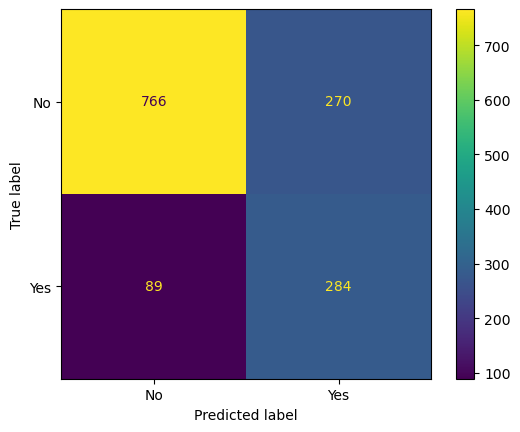

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()